In [2]:
#Regression logistique

#Réalisé par : Mohamed Wahbi 
#Encadré par : Dr.Aboutabit

In [3]:
#importation des bibliotheques
import os 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import optimize as opt

Text(0, 0.5, 'Exam 2 Score')

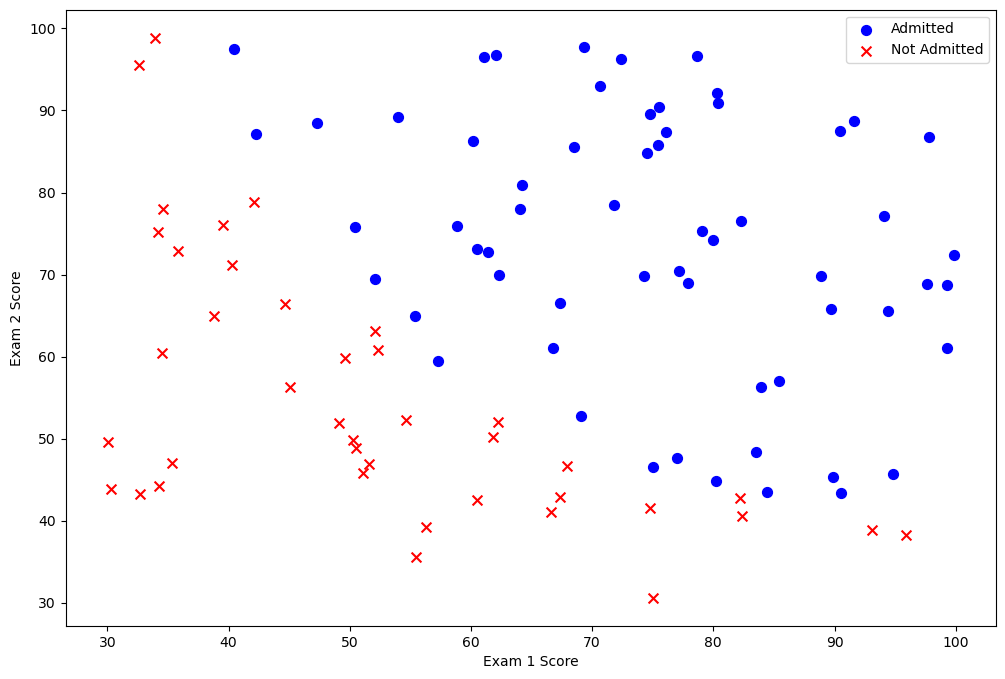

In [8]:
#Dessin du graphe, a partir des données du fichier Ex2data1 

data = pd.read_csv('ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [9]:
data.insert(0, 'Ones', 1)
cols = data.shape[1]
X = data.iloc[:, 0:cols -1]
y = data.iloc[:, cols -1:cols]

X = np.array(X.values)
y = np.array(y.values).reshape(-1)
theta = np.zeros(3)

In [10]:
#implémentation de la fct sigmoid()
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
#la fonction de cout
def costFunction(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))

    cost = (-1 / m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))

    return cost
costFunction(theta, X, y)

0.6931471805599452

In [12]:
#le gradient de la fonction de cout
def gradFunction(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    
    grad = 1/m * np.dot(X.transpose(), (h - y))
    
    return  grad
gradFunction(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [13]:
# l'optimisation :
result = opt.fmin_tnc(func=costFunction, x0=theta, fprime=gradFunction, args=(X,y))
result

(array([-25.16131862,   0.20623159,   0.20147149]), 36, 0)

In [14]:
#cette fonction prédis pour un ensemble de données X, en prenant un vecteur et Theta comme entrés, calcule les probabilités et retourne un résultat binnaire comme sortie ( 1 ou 0)
def predict(theta, X):
    probability = sigmoid(np.dot(X, theta))
    return [1 if x >= 0.5 else 0 for x in probability]

predict(result[0], X)

[0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1]

In [15]:
# calcule de précision (Accuracy)
theta_min = np.array(result[0])  
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) / len(correct)) 

print('Accuracy = {0}%'.format(accuracy * 100))

Accuracy = 89.0%
